In [36]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Посмотрим на данные

In [38]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


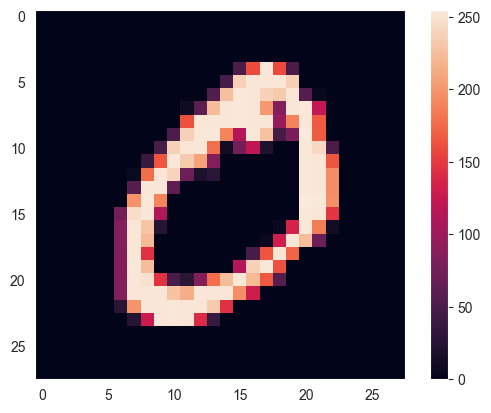

In [39]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)

In [40]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [41]:
X_train = train_images / 255
X_test = test_images / 255

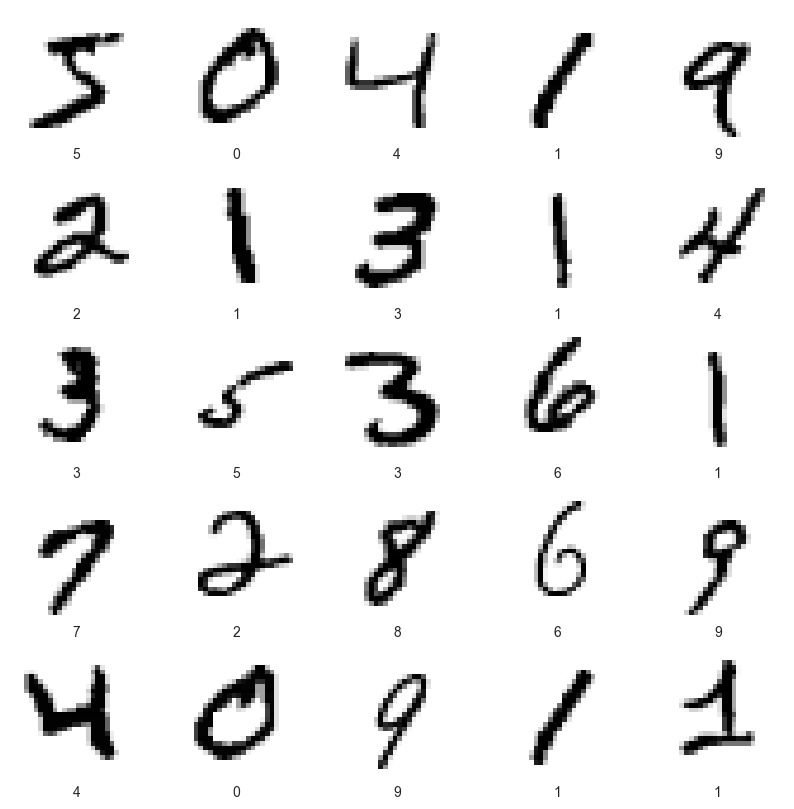

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Создаем модель (c двумя слоями)

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [45]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(X_train, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8770 - loss: 0.4321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1226
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9767 - loss: 0.0776
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9833 - loss: 0.0555
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0410


In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9706 - loss: 16.4687
Test loss: 13.9468412399292
Test accuracy: 0.9745000004768372


In [48]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


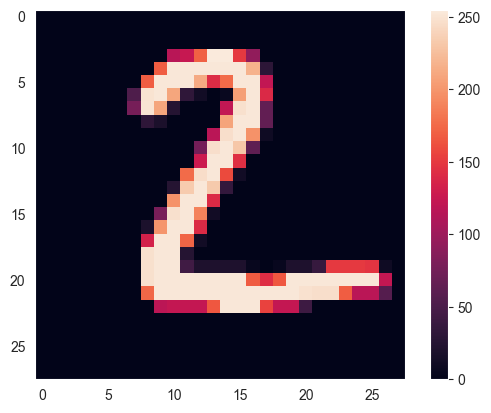

In [49]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)

In [50]:
predictions[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
np.argmax(predictions[1])

2

In [52]:
test_labels[1]

2

# Вывод - модель показала точность 0.98, что является хорошим результатом

Убираем число слоев

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [54]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(X_train, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.8167 - loss: 0.7117
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.9106 - loss: 0.3141
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9200 - loss: 0.2894
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9246 - loss: 0.2709
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.9265 - loss: 0.2632


In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9051 - loss: 51.1905
Test loss: 46.511383056640625
Test accuracy: 0.9168999791145325


# Вывод - модель показала точность 0.92, что является неплохим результатом, но проигрывает модели с двумя слоями